In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.tabular import *
from fastai.vision import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [6]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [7]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 18.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=6b46fcfa47d3194b4120059866a5071d2d254dbf33bcc3e5df6d2f31da5f2ce8
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [8]:
! kaggle competitions download -c multilabel-bird-species-classification-nips2013

 98% 289M/294M [00:02<00:00, 197MB/s]
100% 294M/294M [00:02<00:00, 130MB/s]


In [9]:
! kaggle competitions multilabel-bird-species-classification-nips2013

usage: kaggle competitions [-h]
                           {list,files,download,submit,submissions,leaderboard}
                           ...
kaggle competitions: error: argument command: invalid choice: 'multilabel-bird-species-classification-nips2013' (choose from 'list', 'files', 'download', 'submit', 'submissions', 'leaderboard')


In [10]:
! unzip /content/multilabel-bird-species-classification-nips2013.zip -d /content/multilabel-bird-species-classification-nips2013

Archive:  /content/multilabel-bird-species-classification-nips2013.zip
  inflating: /content/multilabel-bird-species-classification-nips2013/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar  
  inflating: /content/multilabel-bird-species-classification-nips2013/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz  
  inflating: /content/multilabel-bird-species-classification-nips2013/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz  


In [0]:
! tar --extract --file /content/multilabel-bird-species-classification-nips2013/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS.tar

In [0]:
! tar --extract --file /content/multilabel-bird-species-classification-nips2013/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_MFCC.tar.gz

In [0]:
! tar --extract --file /content/multilabel-bird-species-classification-nips2013/NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV.tar.gz

In [0]:
data_dir = Path('/content')
wav_dir = data_dir/'NIPS4B_BIRD_CHALLENGE_TRAIN_TEST_WAV'
spect_dir = Path('./spectrograms')
spect_dir.mkdir(parents=True, exist_ok=True)

In [0]:
import librosa
import librosa.display

def create_spectrogram(fn_audio, fn_gram, zoom=1):
    clip, sample_rate = librosa.load(fn_audio, sr=None)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    fig = plt.figure(figsize=tuple(reversed(S.shape)), dpi=1)
    plt.gca().set_axis_off()
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    fig.savefig(fn_gram, dpi=zoom, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

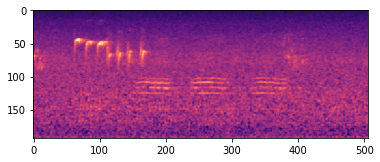

In [16]:
from IPython.display import Image, Audio, display

create_spectrogram(wav_dir/'train/nips4b_birds_trainfile015.wav', '/tmp/015.png', 2)
plt.imshow(plt.imread('/tmp/015.png'))
plt.show()
display(Audio(str(wav_dir/'train/nips4b_birds_trainfile015.wav')))

In [0]:
from fastprogress import progress_bar

def audios_to_spectrograms(from_path, to_path, folder="", from_suffix=".wav", to_suffix=".png", zoom=1):
    (to_path/folder).mkdir(parents=True, exist_ok=True)
    fns = list((from_path/folder).glob('*' + from_suffix))
    pb = progress_bar(range(len(fns)))
    for i, src in zip(pb, fns):
        dest = to_path/folder/(src.stem + to_suffix)
        create_spectrogram(src, dest, zoom)
        pb.comment = src.stem

In [18]:
for ds in ('train', 'test'):
    audios_to_spectrograms(wav_dir, spect_dir, ds, zoom=2)

In [0]:
import pandas as pd 

In [0]:
path_df = "/content/NIPS4B_BIRD_CHALLENGE_TRAIN_LABELS/nips4b_birdchallenge_train_labels.csv"
df_labels_train = pd.read_csv(path_df, header=2, index_col=0)

In [0]:
df_labels_train.reset_index(inplace=True)

In [0]:
df_labels_train.drop(687, inplace=True)

In [0]:
def change_wav_png(row):
    stringa = row.Filename
    stringa = stringa.replace("wav", "png")
    row.Filename = stringa
    return row

In [0]:
df_labels_train = df_labels_train.apply(lambda x: change_wav_png(x), axis=1)

In [25]:
df_labels_train

,Filename,card_species,Empty,class number >,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,nips4b_birds_trainfile001.png,3,NaN,­,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nips4b_birds_trainfile002.png,1,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nips4b_birds_trainfile003.png,2,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nips4b_birds_trainfile004.png,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,nips4b_birds_trainfile005.png,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,nips4b_birds_trainfile683.png,3,NaN,­,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
683,nips4b_birds_trainfile684.png,1,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,nips4b_birds_trainfile685.png,2,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
685,nips4b_birds_trainfile686.png,3,NaN,­,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_labels_train.fillna(value=0,inplace=True)

In [0]:
def crate_label(row):
  i = 1
  a = ""
  for i in range(87):
    if row[i] == 1:
      a += str(i) + " "
  return a
      #lista_label.append(lista_ok)
  #row["tags"] = lista_label
  #return row

In [0]:
df_labels_train["tags"] = df_labels_train.apply(lambda x: crate_label(x), axis=1)

In [29]:
df_labels_train

,Filename,card_species,Empty,class number >,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,tags
0,nips4b_birds_trainfile001.png,3,0.0,­,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7 25 46
1,nips4b_birds_trainfile002.png,1,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
2,nips4b_birds_trainfile003.png,2,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 79
3,nips4b_birds_trainfile004.png,3,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25 64
4,nips4b_birds_trainfile005.png,3,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,nips4b_birds_trainfile683.png,3,0.0,­,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6 47 58
683,nips4b_birds_trainfile684.png,1,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
684,nips4b_birds_trainfile685.png,2,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40
685,nips4b_birds_trainfile686.png,3,0.0,­,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35 52 70


In [0]:
df_definitivo = df_labels_train[["Filename", "tags"]]

In [31]:
df_definitivo

,Filename,tags
0,nips4b_birds_trainfile001.png,7 25 46
1,nips4b_birds_trainfile002.png,81
2,nips4b_birds_trainfile003.png,55 79
3,nips4b_birds_trainfile004.png,25 64
4,nips4b_birds_trainfile005.png,25 64
...,...,...
682,nips4b_birds_trainfile683.png,6 47 58
683,nips4b_birds_trainfile684.png,48
684,nips4b_birds_trainfile685.png,40
685,nips4b_birds_trainfile686.png,35 52 70


In [0]:
np.random.seed(42)
path2 = Path("/content/spectrograms/train")
path_test_x = Path("/content/spectrograms/test")
src = (ImageList.from_df(df_definitivo, path2)
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' ')
       .add_test_folder("test", path_test_x))

In [0]:
data = (src.transform(get_transforms(),size = 64)
        .databunch().normalize(imagenet_stats))

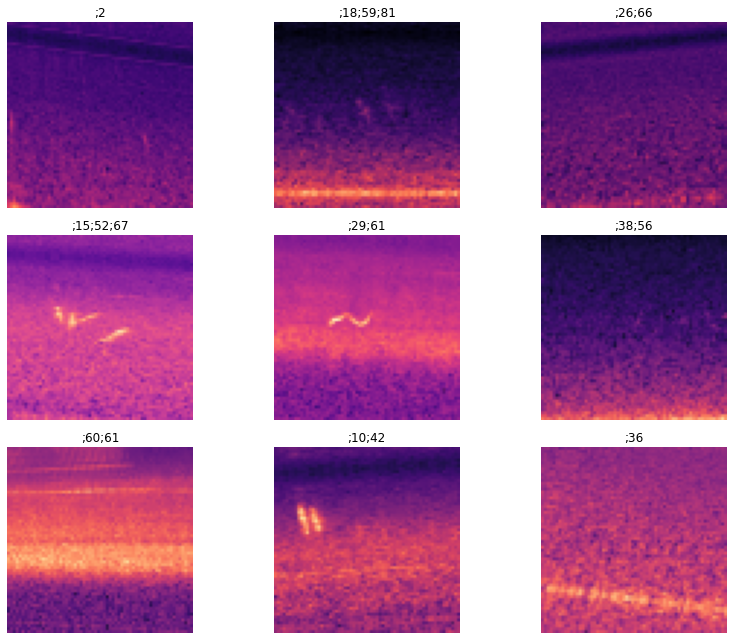

In [34]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch = models.resnet50

In [36]:
learn = cnn_learner(data, arch, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


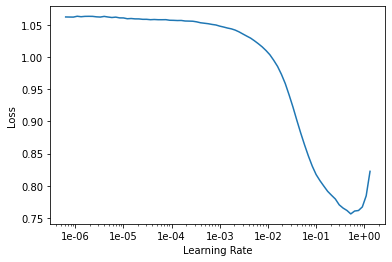

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
lr = 1e-01
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.878158,0.224924,0.719708,00:06
1,0.532740,0.307571,0.932847,00:06
2,0.404536,0.235294,0.932761,00:06
3,0.325951,0.154859,0.967969,00:05
4,0.275423,0.125804,0.967969,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


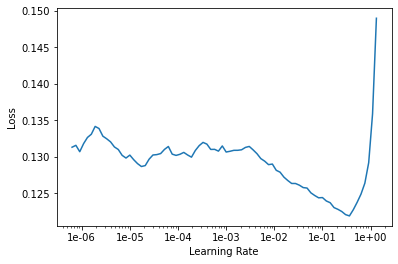

In [39]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.save("96%-stage1")

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


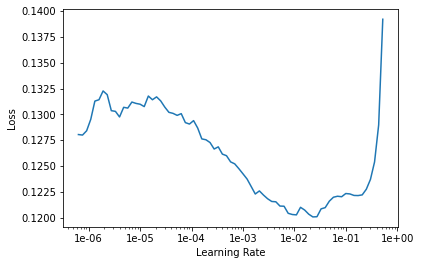

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
lr=1e-03
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.131326,0.118375,0.967969,00:06
1,0.125338,0.108604,0.967969,00:06
2,0.120770,0.097332,0.967969,00:06
3,0.116204,0.091141,0.967969,00:06
4,0.113500,0.089315,0.967969,00:06


In [0]:
learn.save("96%-stage2")

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


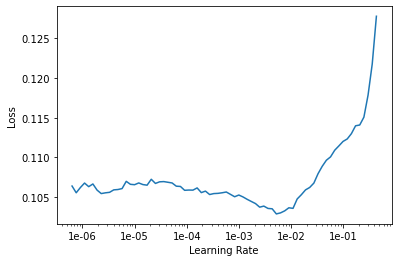

In [46]:
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(5, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.105811,0.089374,0.967969,00:06
1,0.103238,0.093290,0.953714,00:06
2,0.101231,0.088232,0.967969,00:06
3,0.099236,0.083863,0.967969,00:06
4,0.098865,0.082412,0.967969,00:06


In [0]:
learn.save("final")

In [0]:
learn.export()

In [50]:
test = ImageList.from_folder(path_test_x)
len(test)

1000

In [51]:
path = Path("/content/spectrograms/train")
learn = load_learner(path, test=test)
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
thresh = 0.2
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in preds]

In [53]:
labelled_preds[:5]

[' 2', ' 2', '', '', '']

In [0]:
fnames = [f.name[:-4] for f in learn.data.test_ds.items]

In [60]:
preds = learn.get_preds(ds_type=DatasetType.Test,)

In [63]:
import numpy as np
from sklearn import metrics
fpr, tpr= metrics.roc_curve(fnames, preds)
auc = metrics.auc(fpr,tpr)

ValueError: ignored

In [0]:
#fpr, tpr, thresholds = metrics.roc_curve(true_labels, predictions, pos_label=1)
#auc = metrics.auc(fpr,tpr)

In [0]:
#df_er = pd.DataFrame({'ID':fnames, 'Auc':auc_roc_score}, columns=['ID', 'Auc'])

In [0]:
#df_er.to_csv(path/'submission.csv', index=False)

In [0]:
#! kaggle competitions submit planet-understanding-the-amazon-from-space -f {path/'submission.csv'} -m "My submission"